# Communities and Crime Data Set - Analysis and Prediction

# 1. Data Quality analysis

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, make_scorer

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('communities.data', names=['state',
'county',
'community',
'communityname',
'fold',
'population',
'householdsize',
'racepctblack',
'racePctWhite',
'racePctAsian',
'racePctHisp',
'agePct12t21',
'agePct12t29',
'agePct16t24',
'agePct65up',
'numbUrban',
'pctUrban',
'medIncome',
'pctWWage',
'pctWFarmSelf',
'pctWInvInc',
'pctWSocSec',
'pctWPubAsst',
'pctWRetire',
'medFamInc',
'perCapInc',
'whitePerCap',
'blackPerCap',
'indianPerCap',
'AsianPerCap',
'OtherPerCap',
'HispPerCap',
'NumUnderPov',
'PctPopUnderPov',
'PctLess9thGrade',
'PctNotHSGrad',
'PctBSorMore',
'PctUnemployed',
'PctEmploy',
'PctEmplManu',
'PctEmplProfServ',
'PctOccupManu',
'PctOccupMgmtProf',
'MalePctDivorce',
'MalePctNevMarr',
'FemalePctDiv',
'TotalPctDiv',
'PersPerFam',
'PctFam2Par',
'PctKids2Par',
'PctYoungKids2Par',
'PctTeen2Par',
'PctWorkMomYoungKids',
'PctWorkMom',
'NumIlleg',
'PctIlleg',
'NumImmig',
'PctImmigRecent',
'PctImmigRec5',
'PctImmigRec8',
'PctImmigRec10',
'PctRecentImmig',
'PctRecImmig5',
'PctRecImmig8',
'PctRecImmig10',
'PctSpeakEnglOnly',
'PctNotSpeakEnglWell',
'PctLargHouseFam',
'PctLargHouseOccup',
'PersPerOccupHous',
'PersPerOwnOccHous',
'PersPerRentOccHous',
'PctPersOwnOccup',
'PctPersDenseHous',
'PctHousLess3BR',
'MedNumBR',
'HousVacant',
'PctHousOccup',
'PctHousOwnOcc',
'PctVacantBoarded',
'PctVacMore6Mos',
'MedYrHousBuilt',
'PctHousNoPhone',
'PctWOFullPlumb',
'OwnOccLowQuart',
'OwnOccMedVal',
'OwnOccHiQuart',
'RentLowQ',
'RentMedian',
'RentHighQ',
'MedRent',
'MedRentPctHousInc',
'MedOwnCostPctInc',
'MedOwnCostPctIncNoMtg',
'NumInShelters',
'NumStreet',
'PctForeignBorn',
'PctBornSameState',
'PctSameHouse85',
'PctSameCity85',
'PctSameState85',
'LemasSwornFT',
'LemasSwFTPerPop',
'LemasSwFTFieldOps',
'LemasSwFTFieldPerPop',
'LemasTotalReq',
'LemasTotReqPerPop',
'PolicReqPerOffic',
'PolicPerPop',
'RacialMatchCommPol',
'PctPolicWhite',
'PctPolicBlack',
'PctPolicHisp',
'PctPolicAsian',
'PctPolicMinor',
'OfficAssgnDrugUnits',
'NumKindsDrugsSeiz',
'PolicAveOTWorked',
'LandArea',
'PopDens',
'PctUsePubTrans',
'PolicCars',
'PolicOperBudg',
'LemasPctPolicOnPatr',
'LemasGangUnitDeploy',
'LemasPctOfficDrugUn',
'PolicBudgPerPop',
'ViolentCrimesPerPop'
])

In [3]:
data.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


* Missing data in this dataset labeled as ?
* For now i will not change ? to NaN value

In [4]:
import numpy as np

At the beginning i replaced ? with NaN and after i decided to create some dummy variables i couldn't get wanted values for dummy variable if there was NaN on missing values. So i decided to leave it as ? at this point, that is why next line is commented.

In [5]:
#data.replace('?',np.nan, inplace=True) # all mising data is labeled with ? and i am changing it to Nan

In [6]:
(data.PolicCars == '?').value_counts()

True     1675
False     319
Name: PolicCars, dtype: int64

I spotted there was missing values in all data that describe information about police. We can see that from 1994 rows there is 1675 missing data.
All data is normalized and only for some data we have information about police. Also in dataset description it is explained that if there was less then 100 police officers per population that kind of data is labbeled as missing.

In [7]:
data.shape

(1994, 128)

In [8]:
data.describe()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
object_col=[col for col in data.columns if data[col].dtypes=='object']

In [10]:
data[object_col].shape

(1994, 26)

There are 26 columns which type is object and type of other 102 columns is numerical.

## 1.1. Checking missing values

In [12]:
(data.PolicCars == '?').value_counts() # there is a lot of missing values

True     1675
False     319
Name: PolicCars, dtype: int64

Cheking for community name.

We can see that there are some missing values in county and community but these variables are probably not so important for prediction. The most concerning ones are Lemas and Polic variables.

In description it said:

A limitation was that the LEMAS survey was of the police departments with at least 100 
officers, plus a random sample of smaller departments. For our purposes, communities 
not found in both census and crime datasets were omitted. Many communities are missing 
LEMAS data.

1. Option is to predict missing data based on correlated variables to the ones with police data, and after that predict is criminal high in some area or not!

2. Which means that we can create dummy variables which will be in values 0 and 1 where 1 - more than 100 police in community, and 0 - less than 100 poloce officers in community. Because in my opinion each community must have at least small number of offciers. We can do that beacuse we have a small amount of data about police officers and cars and etc.

i will make both ways and see which case has better prediction model!

Also we have variables such as 
@attribute PctPolicWhite numeric
@attribute PctPolicBlack numeric
@attribute PctPolicHisp numeric
@attribute PctPolicAsian numeric
@attribute PctPolicMinor numeric which probably can be put in one variable

Attribute Information: (122 predictive, 5 non-predictive, 1 goal) - county and community are not predictive and have many missing values 

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

First we want to see types of columns.

In [12]:
data.dtypes

state                     int64
county                   object
community                object
communityname            object
fold                      int64
population              float64
householdsize           float64
racepctblack            float64
racePctWhite            float64
racePctAsian            float64
racePctHisp             float64
agePct12t21             float64
agePct12t29             float64
agePct16t24             float64
agePct65up              float64
numbUrban               float64
pctUrban                float64
medIncome               float64
pctWWage                float64
pctWFarmSelf            float64
pctWInvInc              float64
pctWSocSec              float64
pctWPubAsst             float64
pctWRetire              float64
medFamInc               float64
perCapInc               float64
whitePerCap             float64
blackPerCap             float64
indianPerCap            float64
AsianPerCap             float64
                         ...   
PctSameH

WE can see that each variable that has missing values is object type. For start ups we will take only numeric variables.

In [13]:
data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [14]:
data_num=data.select_dtypes(include=[np.number])

In [15]:
data_num.head(2)

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67


## 1.2. Distribution of each variable

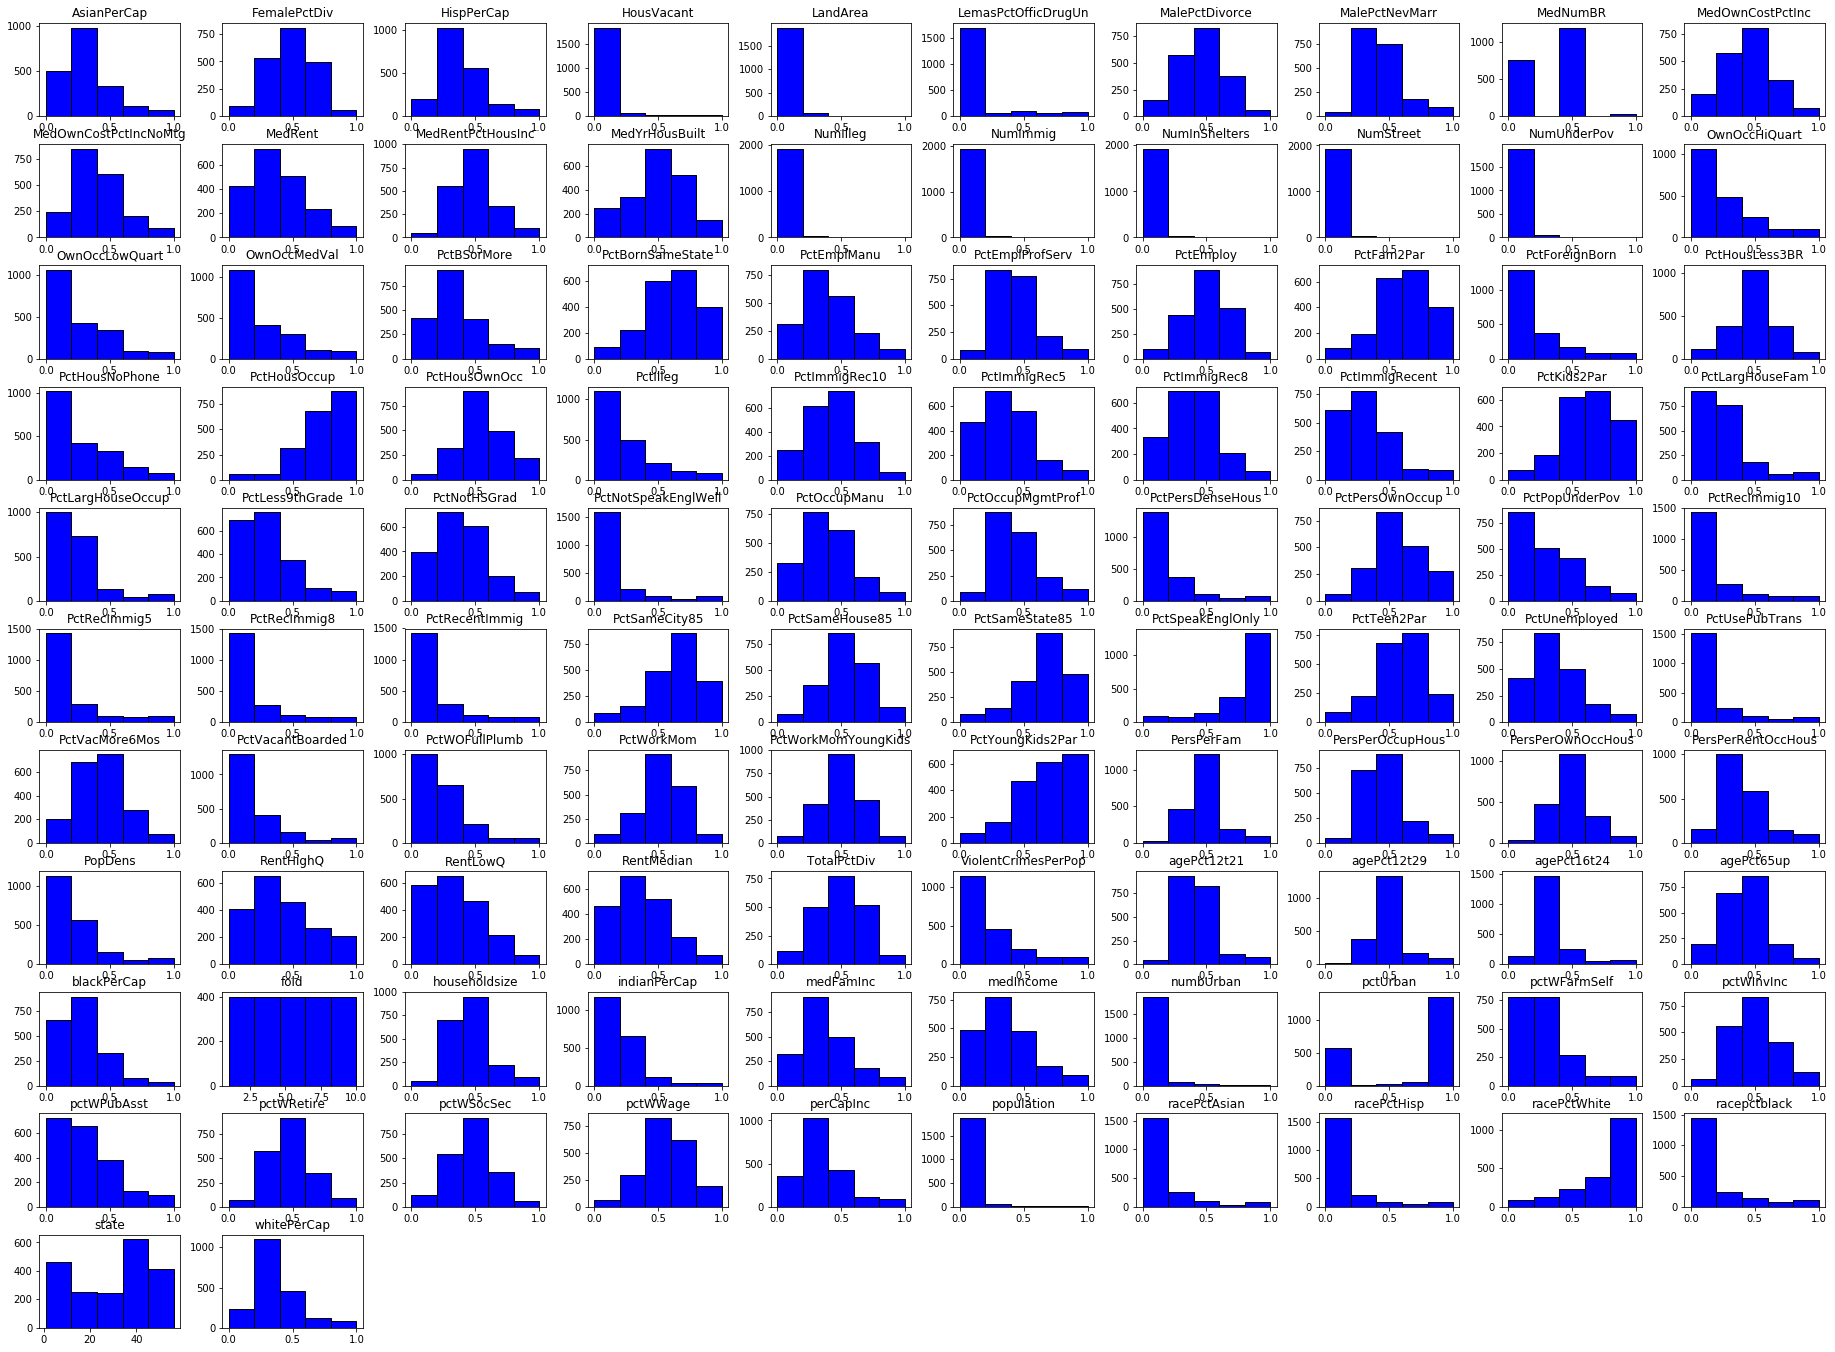

In [16]:
data.hist(bins=5, color='blue', ec='black', figsize=(32, 24), grid=False);

* From distributions we can see that some variables have similar plots.
* each variable is normalized and distributed from 0 to 1.

First 5 rows (until population) are not important for our prediction model so we will drop them.

If we look at distribution of predictive variable we can see that probably we will need to create dummy variable to predict is crime high or not! For that i need to examine on the internet at which value is crime concidered high.

In [17]:
import seaborn as sns

In [18]:
data_pred=data.drop(data.ix[:, 'state':'fold'].columns, axis = 1)  # droping first 5 columns of dataset

In [19]:
data_pred.head(2)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67


## 1.3. Extremes

Problem with finding extremes on normalized data?

In order to find outliers i needed to find more exaplanation on internet and courses. As i understood when we normalize data we squash and strech axis, this means if there was distance d from point A nad B, after normalization this difference d is changed.

Changes nearest neigbor strucutre and density of points!

In [37]:
data_pred.shape

(1994, 123)

In [38]:
data_pred.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1. Since we are still on the first case when we will predict missing data, i will create new data called data_fill which will be our data for prediction.

In [39]:
data_fill=pd.DataFrame(data_pred)

In [40]:
data_fill.head(5)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [41]:
# replacing ? values with nan
data_fill.replace('?',np.nan, inplace=True)

In [42]:
data_fill=data_fill.astype(float) # casting everything as type float

Looking thorugh correlations between variables!

In [43]:
data_fill.population.corr(data_fill.PolicCars)

0.7960895964135688

In [44]:
# pretty high correlation!

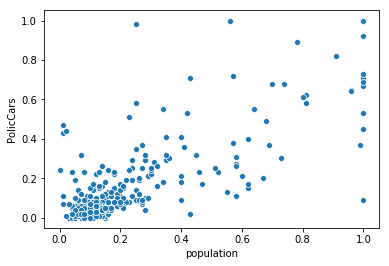

In [45]:
sns.scatterplot(x=data_fill.population, y=data_fill.PolicCars)

In [46]:
# we can see that maybe we have connection between race black, police controls and Violation per population!

In [47]:
data_fill.racepctblack.corr(data_fill.ViolentCrimesPerPop)

0.6312636346597026

In [48]:
# pretty high correlation with target variable!

In [49]:
# let's analize data which has missing variables!

In [50]:
data_drop=data_fill.dropna()

In [51]:
data_drop.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
16,0.15,0.31,0.40,0.63,0.14,0.06,0.58,0.72,0.65,0.47,...,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26,0.49
20,0.25,0.54,0.05,0.71,0.48,0.30,0.42,0.48,0.28,0.32,...,0.09,0.46,0.05,0.09,0.05,0.88,0.5,0.76,0.13,0.34
21,1.00,0.42,0.47,0.59,0.12,0.05,0.41,0.53,0.34,0.33,...,1.00,0.07,0.15,1.00,0.35,0.73,0.0,0.31,0.21,0.69
23,0.11,0.43,0.04,0.89,0.09,0.06,0.45,0.48,0.31,0.46,...,0.16,0.12,0.07,0.04,0.01,0.81,1.0,0.56,0.09,0.63


{'whiskers': [<matplotlib.lines.Line2D at 0x16900945198>,
 'caps': [<matplotlib.lines.Line2D at 0x16900945470>,
 'boxes': [<matplotlib.lines.Line2D at 0x1690089e6d8>],
 'medians': [<matplotlib.lines.Line2D at 0x16900945eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1690195b588>],
 'means': []}

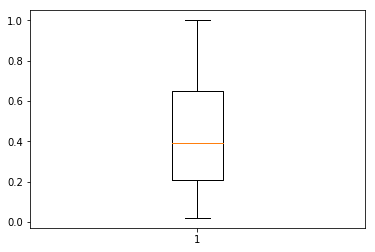

In [52]:
plt.boxplot(data_drop.ViolentCrimesPerPop)

{'whiskers': [<matplotlib.lines.Line2D at 0x169040e07b8>,
 'caps': [<matplotlib.lines.Line2D at 0x169041c5128>,
 'boxes': [<matplotlib.lines.Line2D at 0x169040e0c88>],
 'medians': [<matplotlib.lines.Line2D at 0x169041c5208>],
 'fliers': [<matplotlib.lines.Line2D at 0x169041c5470>],
 'means': []}

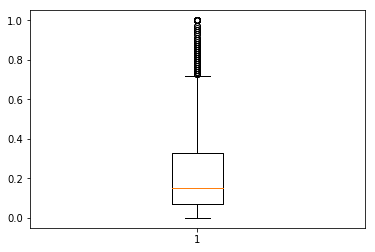

In [53]:
plt.boxplot(data_fill.ViolentCrimesPerPop)

We can see that if we look only data where is Police data recorded then mean of Violence pre population is higher for approximately 0.1 than when we look the whole dataset!

In [54]:
data_drop.shape # 319 rows

(319, 123)

In [55]:
data_fill_missing = data_fill[data_fill['LemasSwornFT'].isnull()]

In [56]:
data_fill_missing.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.0,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.0,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.03
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.01,0.58,0.10,NaN,NaN,NaN,NaN,0.0,NaN,0.14


In [57]:
data_fill_missing.shape

(1675, 123)

In [58]:
# that is correct!

In [59]:
# we can see that for every row that has missing data on police data percent of officers assigned to drug units is 0.00!

# Main idea

Main idea is to make prediction for several cases : 

1. Case : Try to predict missing data about police officers and see is there any impact on target variable.
2. Case : Create dummy variable for 1 if there is more than 100 pollice offciers in population , 0 less then 100.

In the end compare those two predictions!

The normalization preserves rough ratios of values WITHIN an attribute (e.g. double 
the value for double the population within the available precision - except for 
extreme values (all values more than 3 SD above the mean are normalized to 1.00; all 
values more than 3 SD below the mean are nromalized to 0.00)).


## Problem description

In this dataset atrget variable is violence per population, my goal i to find variables with strong predictive power for target variable.

### Main problem:

Main problem is missing huge amount of police data. As described in previous line first i will try predict Police data in order to have better power prediction later in sculpting the final model.

Then on the second model i will create variable dummy instead of missing data and we will see how will that perform.

In [60]:
corr=data_fill.drop("LemasSwornFT", axis=1).apply(lambda x: x.corr(data_fill.LemasSwornFT))
corr_data=pd.DataFrame(corr)

In [61]:
corr_data.head()

,0
population,0.764192
householdsize,-0.042551
racepctblack,0.230911
racePctWhite,-0.289032
racePctAsian,0.035187


In [62]:
corr_data[corr_data[0] > abs(0.5)]

,0
population,0.764192
numbUrban,0.763790
NumUnderPov,0.758502
NumIlleg,0.791530
NumImmig,0.630309
HousVacant,0.695004
NumInShelters,0.724487
NumStreet,0.618120
LemasTotalReq,0.868876
OfficAssgnDrugUnits,0.906499


### Building a model for predicting police data

In [207]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
X_fill=data_fill[['population','numbUrban','NumUnderPov','NumIlleg','NumImmig','HousVacant','NumInShelters',
'NumStreet','LandArea','LemasSwornFT',
'LemasSwFTPerPop',
'LemasSwFTFieldOps',
'LemasSwFTFieldPerPop',
'LemasTotalReq',
'LemasTotReqPerPop',
'PolicReqPerOffic',
'PolicPerPop',
'RacialMatchCommPol',
'PctPolicWhite',
'PctPolicBlack',
'PctPolicHisp',
'PctPolicAsian',
'PctPolicMinor',
'OfficAssgnDrugUnits',
'NumKindsDrugsSeiz',
'PolicAveOTWorked','PolicCars',
'PolicOperBudg',
'LemasPctPolicOnPatr',
'LemasGangUnitDeploy',
'LemasPctOfficDrugUn',
'PolicBudgPerPop']]

In [208]:
#Step-1: Split the dataset that contains the missing values and no missing values are test and train respectively.
X_train = X_fill[X_fill['LemasSwornFT'].notnull()]

In [209]:
X_train.columns

Index(['population', 'numbUrban', 'NumUnderPov', 'NumIlleg', 'NumImmig',
       'HousVacant', 'NumInShelters', 'NumStreet', 'LandArea', 'LemasSwornFT',
       'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop',
       'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
       'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp',
       'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits',
       'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop'],
      dtype='object')

In [210]:
X_train=X_train.drop(columns=['LemasSwornFT',
       'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop',
       'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
       'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp',
       'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits',
       'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop'])

In [211]:
X_train.columns

Index(['population', 'numbUrban', 'NumUnderPov', 'NumIlleg', 'NumImmig',
       'HousVacant', 'NumInShelters', 'NumStreet', 'LandArea'],
      dtype='object')

In [212]:
y_train = X_fill[X_fill['LemasSwornFT'].notnull()]

In [213]:
y_train=y_train[['LemasSwornFT',
       'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop',
       'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
       'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp',
       'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits',
       'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop']]

In [214]:
X_test = X_fill[X_fill['LemasSwornFT'].isnull()]

In [215]:
X_test=X_test.drop(columns=['LemasSwornFT',
       'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop',
       'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
       'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp',
       'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits',
       'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop'])

In [216]:
y_test = X_fill[X_fill['LemasSwornFT'].isnull()]

In [217]:
y_test=y_test[['LemasSwornFT',
       'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop',
       'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
       'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp',
       'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits',
       'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop']]

In [218]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [219]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [220]:
predicted_police = linreg.predict(X_test)

In [221]:
predicted_police.shape

(1675, 23)

In [222]:
predicted_police_data=pd.DataFrame(predicted_police, columns=['LemasSwornFT',
       'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop',
       'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
       'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp',
       'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits',
       'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop'])

In [223]:
X_fill[['LemasSwornFT',
       'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop',
       'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
       'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp',
       'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits',
       'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop']]=predicted_police_data[['LemasSwornFT',
       'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop',
       'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
       'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp',
       'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits',
       'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop']]

In [224]:
X_fill.head()

,population,numbUrban,NumUnderPov,NumIlleg,NumImmig,HousVacant,NumInShelters,NumStreet,LandArea,LemasSwornFT,...,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.19,0.20,0.08,0.04,0.03,0.21,0.04,0.0,0.12,-0.026308,...,0.213857,0.007827,0.487818,0.301322,-0.006302,-0.020778,0.722648,0.363075,0.609796,0.185808
1,0.00,0.02,0.01,0.00,0.01,0.02,0.00,0.0,0.02,-0.010891,...,0.194299,0.029979,0.491950,0.203711,0.043849,-0.014876,0.654382,0.474108,0.721312,0.266418
2,0.00,0.00,0.01,0.01,0.00,0.01,0.00,0.0,0.01,-0.009413,...,0.194997,0.016410,0.505033,0.321128,-0.013271,-0.006417,0.719670,0.337130,0.589233,0.181654
3,0.04,0.06,0.01,0.03,0.02,0.01,0.00,0.0,0.02,-0.017838,...,0.186488,0.018399,0.495060,0.251729,0.018997,-0.017176,0.689351,0.415644,0.658885,0.218085
4,0.01,0.02,0.00,0.00,0.00,0.01,0.00,0.0,0.04,-0.019489,...,0.206442,0.011006,0.497270,0.317834,-0.009521,-0.011568,0.726295,0.358952,0.599695,0.186425


In [225]:
data_fill_missing[['population','numbUrban','NumUnderPov','NumIlleg','NumImmig','HousVacant','NumInShelters',
'NumStreet','LandArea','LemasSwornFT',
'LemasSwFTPerPop',
'LemasSwFTFieldOps',
'LemasSwFTFieldPerPop',
'LemasTotalReq',
'LemasTotReqPerPop',
'PolicReqPerOffic',
'PolicPerPop',
'RacialMatchCommPol',
'PctPolicWhite',
'PctPolicBlack',
'PctPolicHisp',
'PctPolicAsian',
'PctPolicMinor',
'OfficAssgnDrugUnits',
'NumKindsDrugsSeiz',
'PolicAveOTWorked','PolicCars',
'PolicOperBudg',
'LemasPctPolicOnPatr',
'LemasGangUnitDeploy',
'LemasPctOfficDrugUn',
'PolicBudgPerPop']] = X_fill[['population','numbUrban','NumUnderPov','NumIlleg','NumImmig','HousVacant','NumInShelters',
'NumStreet','LandArea','LemasSwornFT',
'LemasSwFTPerPop',
'LemasSwFTFieldOps',
'LemasSwFTFieldPerPop',
'LemasTotalReq',
'LemasTotReqPerPop',
'PolicReqPerOffic',
'PolicPerPop',
'RacialMatchCommPol',
'PctPolicWhite',
'PctPolicBlack',
'PctPolicHisp',
'PctPolicAsian',
'PctPolicMinor',
'OfficAssgnDrugUnits',
'NumKindsDrugsSeiz',
'PolicAveOTWorked','PolicCars',
'PolicOperBudg',
'LemasPctPolicOnPatr',
'LemasGangUnitDeploy',
'LemasPctOfficDrugUn',
'PolicBudgPerPop']]

In [226]:
data_fill_missing.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,HighCrime
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.12,0.45,0.043849,-0.014876,0.654382,0.474108,0.721312,0.266418,0.67,1
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.21,0.02,-0.013271,-0.006417,0.719670,0.337130,0.589233,0.181654,0.43,1
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.39,0.28,0.018997,-0.017176,0.689351,0.415644,0.658885,0.218085,0.12,1
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.09,0.02,-0.009521,-0.011568,0.726295,0.358952,0.599695,0.186425,0.03,0
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.58,0.10,0.024290,-0.016327,0.686709,0.421070,0.660268,0.216281,0.14,1


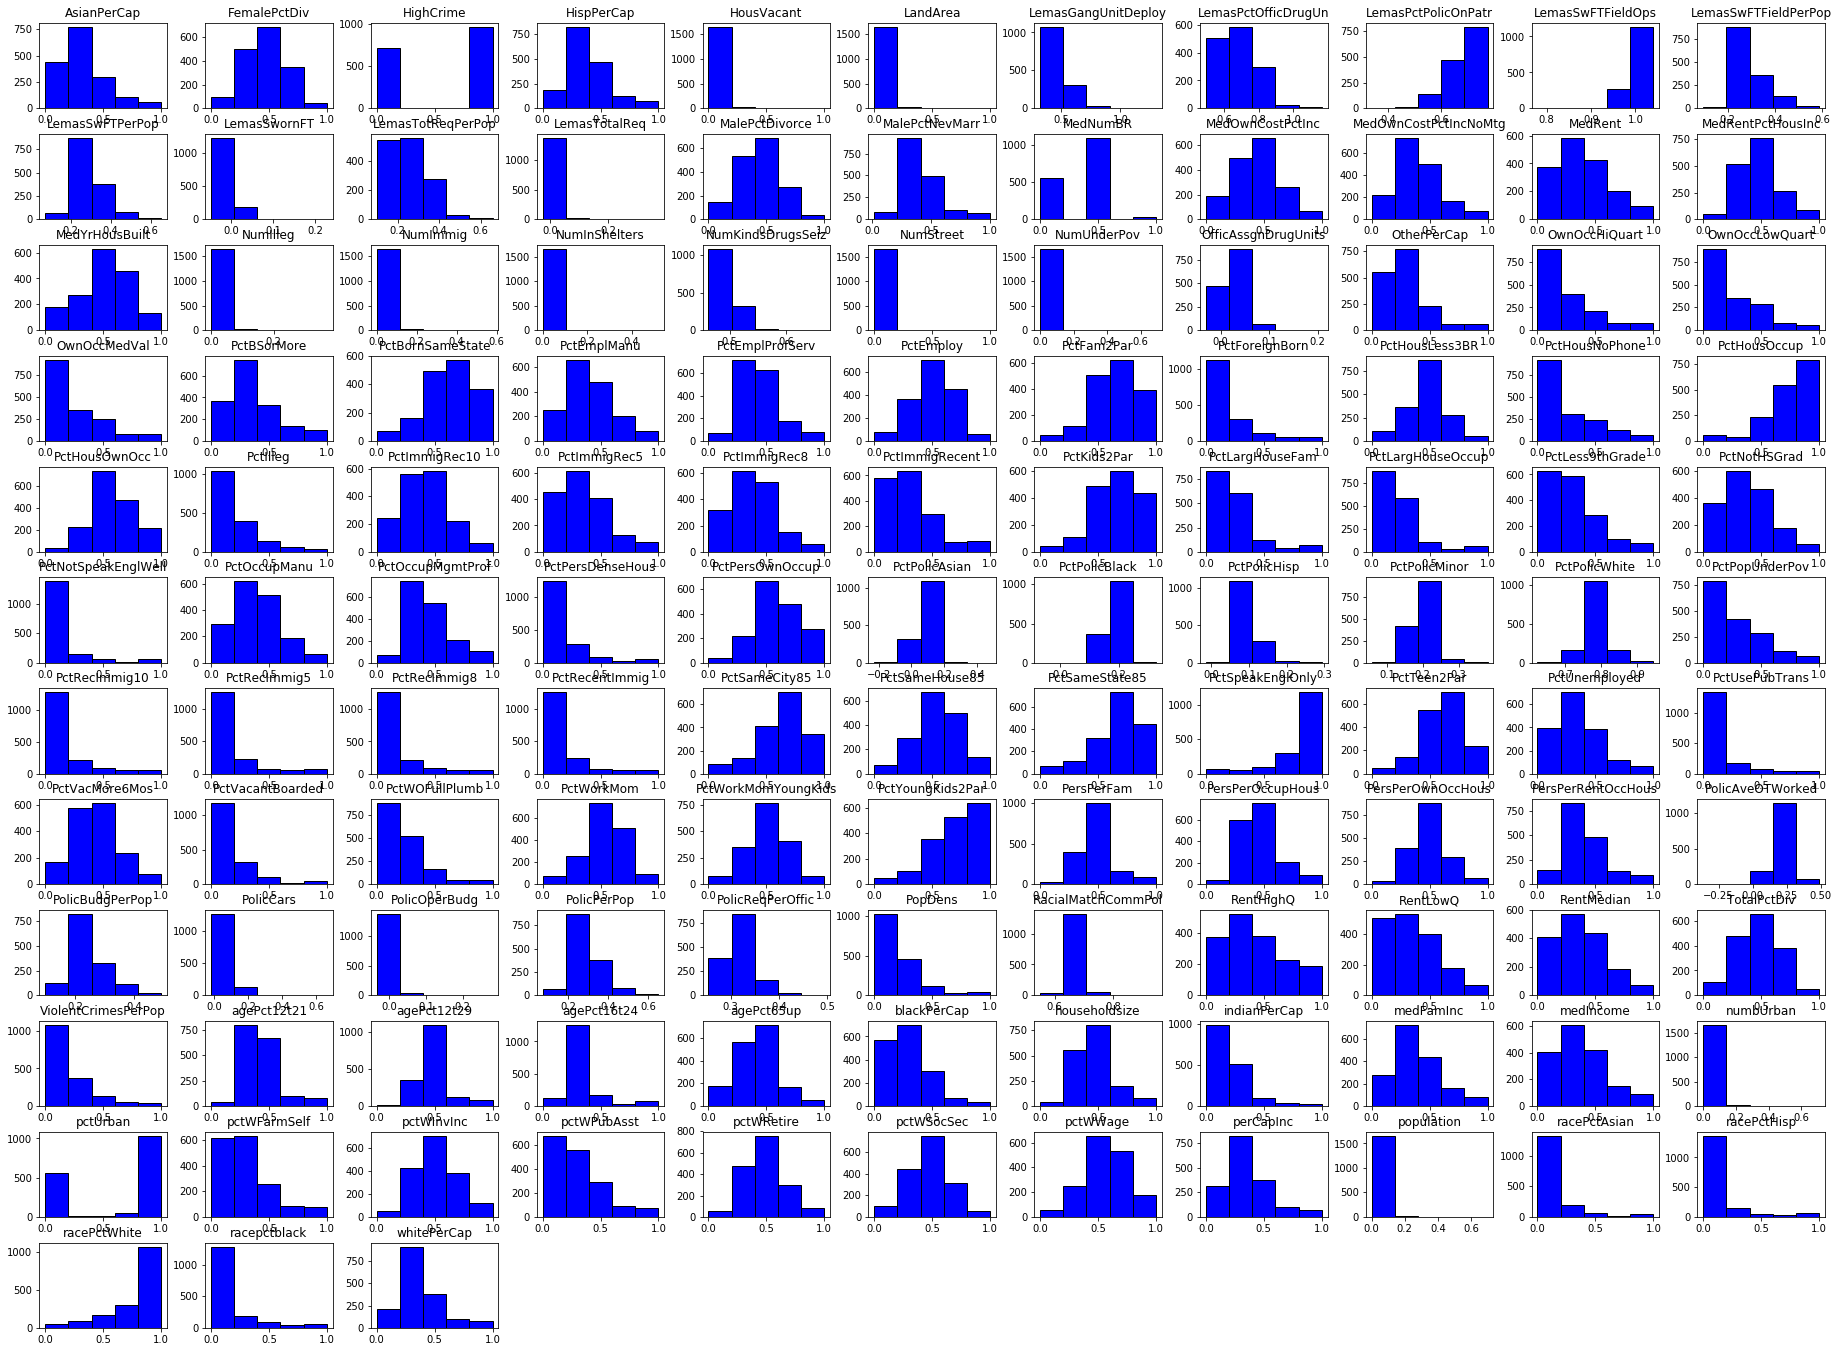

In [227]:
data_fill_missing.hist(bins=5, color='blue', ec='black', figsize=(32, 24), grid=False);

With distributions we can see that some variables has pretty similar distributions:
PctPolicAsian and hisp. we need to check correlation between each data and see which columns we can keep!

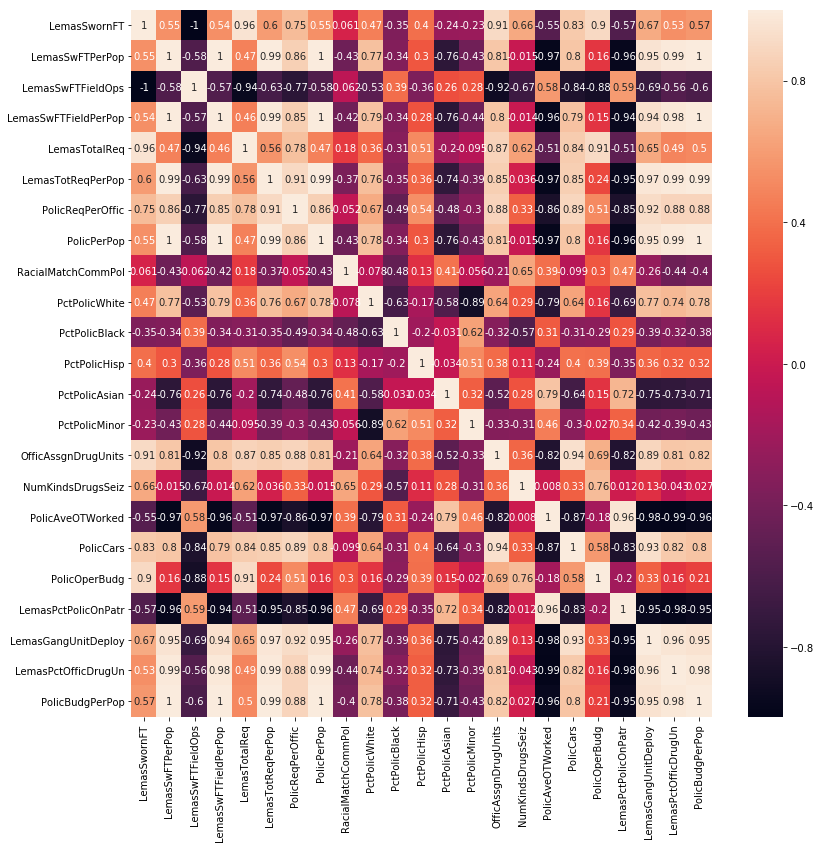

In [228]:
plt.figure(figsize=(13,13))
sns.heatmap(predicted_police_data.corr(), annot=True)

We can see strong correlations between some variables!! we will drop data after we see weight of evidence and information value for each variable!

In [85]:
correlation_predicted=pd.DataFrame(predicted_police_data.corr())

In [86]:
correlation_predicted.head()

,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,...,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
LemasSwornFT,1.000000,0.545279,-0.997330,0.538046,0.957040,0.601222,0.752116,0.545312,0.060505,0.469205,...,-0.225254,0.910327,0.661069,-0.551769,0.827835,0.903008,-0.569590,0.671861,0.532477,0.572618
LemasSwFTPerPop,0.545279,1.000000,-0.576388,0.998209,0.474857,0.993065,0.856962,1.000000,-0.428232,0.774961,...,-0.425911,0.805771,-0.014800,-0.971308,0.802502,0.161854,-0.960887,0.953299,0.986939,0.995682
LemasSwFTFieldOps,-0.997330,-0.576388,1.000000,-0.571210,-0.944620,-0.628914,-0.769417,-0.576424,-0.061828,-0.525566,...,0.284876,-0.916934,-0.672232,0.580200,-0.836188,-0.883165,0.588937,-0.694422,-0.559065,-0.603961
LemasSwFTFieldPerPop,0.538046,0.998209,-0.571210,1.000000,0.462879,0.990357,0.846819,0.998212,-0.421894,0.785164,...,-0.440965,0.797297,-0.014196,-0.961336,0.785888,0.154434,-0.943343,0.942630,0.977203,0.995458
LemasTotalReq,0.957040,0.474857,-0.944620,0.462879,1.000000,0.556339,0.775881,0.474868,0.180023,0.360314,...,-0.094579,0.873807,0.619353,-0.512744,0.836098,0.913575,-0.509550,0.650454,0.489400,0.504034


# Unvariant analysis

* WoE, IV for each variable

To do that we will create new variable which will be calles high crime. This variable will be 1=True if ViolentCrimesPerPop is greater than 0.1 otherwise is 0= False

In [87]:
def HighCrime(data_fill_missing):
    if data_fill_missing['ViolentCrimesPerPop'] > 0.1:
        return 1
    else:
        return 0

In [88]:
data_fill_missing['HighCrime']=data_fill_missing.apply(HighCrime, axis=1)

In [89]:
data_fill_missing.head(2)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,HighCrime
1,0.0,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.12,0.45,0.043849,-0.014876,0.654382,0.474108,0.721312,0.266418,0.67,1
2,0.0,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.21,0.02,-0.013271,-0.006417,0.719670,0.337130,0.589233,0.181654,0.43,1


In [90]:
#is there any missing data?

In [91]:
data_fill_missing.isnull().sum()

population                0
householdsize             0
racepctblack              0
racePctWhite              0
racePctAsian              0
racePctHisp               0
agePct12t21               0
agePct12t29               0
agePct16t24               0
agePct65up                0
numbUrban                 0
pctUrban                  0
medIncome                 0
pctWWage                  0
pctWFarmSelf              0
pctWInvInc                0
pctWSocSec                0
pctWPubAsst               0
pctWRetire                0
medFamInc                 0
perCapInc                 0
whitePerCap               0
blackPerCap               0
indianPerCap              0
AsianPerCap               0
OtherPerCap               1
HispPerCap                0
NumUnderPov               0
PctPopUnderPov            0
PctLess9thGrade           0
                       ... 
PctSameCity85             0
PctSameState85            0
LemasSwornFT            266
LemasSwFTPerPop         266
LemasSwFTFieldOps   

WE still have some missing data on police records.

In [92]:
data_fill_missing[data_fill_missing.PolicCars.isnull()]

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,HighCrime
1675,0.01,0.71,0.01,0.98,0.06,0.01,0.43,0.47,0.33,0.28,...,0.09,0.17,NaN,NaN,NaN,NaN,NaN,NaN,0.18,1
1676,0.00,0.52,0.36,0.60,0.17,0.21,0.36,0.51,0.31,0.42,...,0.45,0.28,NaN,NaN,NaN,NaN,NaN,NaN,0.28,1
1677,0.02,0.41,0.62,0.50,0.03,0.01,0.45,0.48,0.32,0.50,...,0.11,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.57,1
1678,0.00,0.47,0.88,0.24,0.02,0.01,0.66,0.59,0.50,0.51,...,0.13,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.39,1
1679,0.01,0.49,0.03,0.86,0.42,0.08,0.32,0.35,0.21,0.45,...,0.22,1.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0
1680,0.03,0.50,0.03,0.86,0.12,0.27,0.45,0.52,0.33,0.19,...,0.33,0.14,NaN,NaN,NaN,NaN,NaN,NaN,0.14,1
1681,0.00,0.36,0.01,0.96,0.06,0.07,0.37,0.29,0.17,0.79,...,0.03,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.12,1
1682,0.00,0.72,0.09,0.92,0.05,0.01,1.00,1.00,1.00,0.19,...,0.20,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0
1683,0.07,0.90,0.15,0.12,1.00,0.23,0.62,0.53,0.41,0.16,...,0.52,0.05,NaN,NaN,NaN,NaN,NaN,NaN,0.37,1
1687,0.01,0.58,0.01,0.98,0.07,0.03,0.43,0.37,0.24,0.24,...,0.03,0.17,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0


We can drop that data since it is only 266 rows from 1900!

In [93]:
data_new=data_fill_missing.dropna()

In [94]:
data_new.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,HighCrime
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.12,0.45,0.043849,-0.014876,0.654382,0.474108,0.721312,0.266418,0.67,1
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.21,0.02,-0.013271,-0.006417,0.719670,0.337130,0.589233,0.181654,0.43,1
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.39,0.28,0.018997,-0.017176,0.689351,0.415644,0.658885,0.218085,0.12,1
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.09,0.02,-0.009521,-0.011568,0.726295,0.358952,0.599695,0.186425,0.03,0
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.58,0.10,0.024290,-0.016327,0.686709,0.421070,0.660268,0.216281,0.14,1


In [95]:
data_new.shape

(1408, 124)

While predicting missing data we have some strong correlations between data so we should clean that! but first before selecting variables we will do woe and iv.

Can we see relation how many are there high crime cases?

In [96]:
percentage_intances = data_new.groupby('HighCrime').size() * 100 / len(data_new)
print(percentage_intances)

HighCrime
0    43.323864
1    56.676136
dtype: float64


We can see that there are 43% low crime populations and 56% high crime populations

data_dummy.dtypes.unique() # we have all variables as type float

We need to create functions that will calculate Woe and IV for every variable!!!

In [97]:
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [98]:
final_iv, IV = data_vars(data_new.iloc[:,:-2],data_new.HighCrime)

In [99]:
final_iv.head(5)

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,population,0.00,0.01,696,339,0.487069,357,0.512931,0.424812,0.585246,-0.320385,0.192157
1,population,0.02,0.02,230,119,0.517391,111,0.482609,0.149123,0.181967,-0.199056,0.192157
2,population,0.03,0.03,166,106,0.638554,60,0.361446,0.132832,0.098361,0.300445,0.192157
3,population,0.04,0.70,316,234,0.740506,82,0.259494,0.293233,0.134426,0.779952,0.192157
4,householdsize,0.00,0.36,378,244,0.645503,134,0.354497,0.305764,0.219672,0.330679,0.044261


In [100]:
IV.head(5)

,VAR_NAME,IV
0,AsianPerCap,0.126117
1,FemalePctDiv,1.676395
2,HispPerCap,0.323048
3,HousVacant,0.699604
4,LandArea,0.011508


In [101]:
import seaborn as sns

These variables have suspicous relation between target variable and them!! we are goin to check variables with IV between 0.1 and 0.5

In [102]:
# strong predictors!
IV[(abs(IV.IV) > 0.3) & (abs(IV.IV) < 0.5)]

,VAR_NAME,IV
2,HispPerCap,0.323048
20,MedRentPctHousInc,0.413895
33,PctBSorMore,0.497475
37,PctEmploy,0.303612
45,PctImmigRec10,0.387717
50,PctLargHouseFam,0.473612
51,PctLargHouseOccup,0.354504
54,PctNotSpeakEnglWell,0.480178
55,PctOccupManu,0.385346
70,PctSameHouse85,0.324387


In [103]:
strong_predictors=IV[(abs(IV.IV) > 0.3) & (abs(IV.IV) < 0.5)]

In [104]:
strong_predictors=pd.DataFrame(strong_predictors)

In [105]:
final_iv[final_iv.VAR_NAME=='HispPerCap']

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
138,HispPerCap,0.00,0.26,394,274,0.695431,120,0.304569,0.343358,0.196721,0.556987,0.323048
139,HispPerCap,0.27,0.35,341,224,0.656891,117,0.343109,0.280702,0.191803,0.380822,0.323048
140,HispPerCap,0.36,0.49,328,182,0.554878,146,0.445122,0.228070,0.239344,-0.048250,0.323048
141,HispPerCap,0.50,1.00,345,118,0.342029,227,0.657971,0.147870,0.372131,-0.922915,0.323048


In [106]:
final_iv[final_iv.VAR_NAME=='MedRentPctHousInc']

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
500,MedRentPctHousInc,0.00,0.28,159,47,0.295597,112,0.704403,0.058897,0.183607,-1.137001,0.413895
501,MedRentPctHousInc,0.29,0.35,170,73,0.429412,97,0.570588,0.091479,0.159016,-0.552901,0.413895
502,MedRentPctHousInc,0.36,0.39,151,67,0.443709,84,0.556291,0.083960,0.137705,-0.494774,0.413895
503,MedRentPctHousInc,0.40,0.44,162,81,0.500000,81,0.500000,0.101504,0.132787,-0.268650,0.413895
504,MedRentPctHousInc,0.45,0.49,148,90,0.608108,58,0.391892,0.112782,0.095082,0.170717,0.413895
505,MedRentPctHousInc,0.50,0.55,184,118,0.641304,66,0.358696,0.147870,0.108197,0.312380,0.413895
506,MedRentPctHousInc,0.56,0.60,145,100,0.689655,45,0.310345,0.125313,0.073770,0.529858,0.413895
507,MedRentPctHousInc,0.61,0.68,132,100,0.757576,32,0.242424,0.125313,0.052459,0.870785,0.413895
508,MedRentPctHousInc,0.69,1.00,157,122,0.777070,35,0.222930,0.152882,0.057377,0.980023,0.413895


In [107]:
final_iv[final_iv.VAR_NAME=='PctBSorMore']

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
172,PctBSorMore,0.00,0.20,352,265,0.752841,87,0.247159,0.332080,0.142623,0.845172,0.497475
173,PctBSorMore,0.21,0.30,361,245,0.678670,116,0.321330,0.307018,0.190164,0.479018,0.497475
174,PctBSorMore,0.31,0.47,351,181,0.515670,170,0.484330,0.226817,0.278689,-0.205951,0.497475
175,PctBSorMore,0.48,1.00,344,107,0.311047,237,0.688953,0.134085,0.388525,-1.063881,0.497475


In [108]:
final_iv[final_iv.VAR_NAME=='PctEmploy']

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
184,PctEmploy,0.00,0.38,371,274,0.738544,97,0.261456,0.343358,0.159016,0.769767,0.303612
185,PctEmploy,0.39,0.51,343,220,0.641399,123,0.358601,0.275689,0.201639,0.312794,0.303612
186,PctEmploy,0.52,0.63,351,162,0.461538,189,0.538462,0.203008,0.309836,-0.422800,0.303612
187,PctEmploy,0.64,1.00,343,142,0.413994,201,0.586006,0.177945,0.329508,-0.616127,0.303612


## Dummy variable creation

Fortunately thi is too complicated for me at this stage to create loop that takes average of each bin and put as dummy.

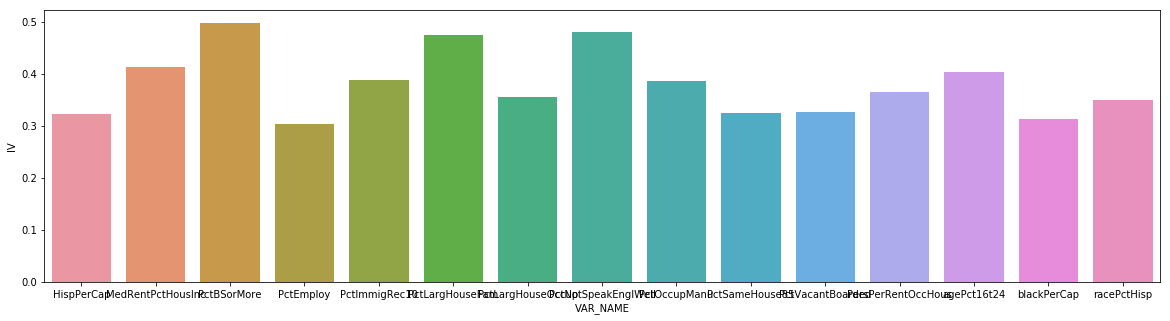

In [109]:
plt.figure(figsize=(20,5))
sns.barplot(x=strong_predictors.VAR_NAME, y=strong_predictors.IV)

In [110]:
# for each of these strong variables now we will plot function of WOE

In [111]:
# what happend our predicted data?

In [112]:
IV[IV.IV < 0.1]

,VAR_NAME,IV
4,LandArea,0.011508
5,LemasGangUnitDeploy,0.000198
6,LemasPctOfficDrugUn,0.006411
7,LemasPctPolicOnPatr,0.000301
8,LemasSwFTFieldOps,0.000837
9,LemasSwFTFieldPerPop,0.002783
10,LemasSwFTPerPop,0.004465
11,LemasSwornFT,0.002444
12,LemasTotReqPerPop,0.003348
13,LemasTotalReq,0.004821


we can see that all our perdicted data have IV less than 0.1 . Which means that these data is not significant for prediction. Even though it is strange because it's data about police information

In [113]:
data_new3=pd.DataFrame(data_new)

In [114]:
data_new3.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,HighCrime
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.12,0.45,0.043849,-0.014876,0.654382,0.474108,0.721312,0.266418,0.67,1
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.21,0.02,-0.013271,-0.006417,0.719670,0.337130,0.589233,0.181654,0.43,1
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.39,0.28,0.018997,-0.017176,0.689351,0.415644,0.658885,0.218085,0.12,1
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.09,0.02,-0.009521,-0.011568,0.726295,0.358952,0.599695,0.186425,0.03,0
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.58,0.10,0.024290,-0.016327,0.686709,0.421070,0.660268,0.216281,0.14,1


In [115]:
final_iv4, IV4 = data_vars(data_new3.iloc[:,:-2],data_new3.HighCrime)

In [116]:
IV4[(IV4.IV > 0.3) & (IV4.IV < 0.5)]

,VAR_NAME,IV
2,HispPerCap,0.323048
20,MedRentPctHousInc,0.413895
33,PctBSorMore,0.497475
37,PctEmploy,0.303612
45,PctImmigRec10,0.387717
50,PctLargHouseFam,0.473612
51,PctLargHouseOccup,0.354504
54,PctNotSpeakEnglWell,0.480178
55,PctOccupManu,0.385346
70,PctSameHouse85,0.324387


In [117]:
corr_columns=IV4[(IV4.IV > 0.3) & (IV4.IV < 0.5)].VAR_NAME

In [118]:
corr_columns.values

array(['HispPerCap', 'MedRentPctHousInc', 'PctBSorMore', 'PctEmploy',
       'PctImmigRec10', 'PctLargHouseFam', 'PctLargHouseOccup',
       'PctNotSpeakEnglWell', 'PctOccupManu', 'PctSameHouse85',
       'PctVacantBoarded', 'PersPerRentOccHous', 'agePct16t24',
       'blackPerCap', 'racePctHisp'], dtype=object)

In [119]:
corr=data_new3.drop("HighCrime", axis=1).apply(lambda x: x.corr(data_new3.HighCrime))

In [120]:
corr_data=pd.DataFrame(corr)

In [121]:
corr_data=corr_data.reset_index()

In [122]:
corr_data.head()

,index,0
0,population,0.178641
1,householdsize,-0.063639
2,racepctblack,0.391737
3,racePctWhite,-0.500254
4,racePctAsian,0.066218


In [123]:
corr_data.columns=['Variable','Corr']

In [124]:
corr_data.head()

,Variable,Corr
0,population,0.178641
1,householdsize,-0.063639
2,racepctblack,0.391737
3,racePctWhite,-0.500254
4,racePctAsian,0.066218


In [125]:
corr_data[corr_data.Corr > 0.2]

,Variable,Corr
2,racepctblack,0.391737
5,racePctHisp,0.319824
17,pctWPubAsst,0.447771
27,NumUnderPov,0.335792
28,PctPopUnderPov,0.415539
29,PctLess9thGrade,0.354260
30,PctNotHSGrad,0.407885
32,PctUnemployed,0.402960
36,PctOccupManu,0.277916
38,MalePctDivorce,0.495056


Based on those two informations i will choose most predictive significant variables for target variable.

In [126]:
data_pred=data_new3[['MedRentPctHousInc','PctImmigRec10','PctImmigRec8','PctLargHouseOccup','PctNotSpeakEnglWell','PctOccupManu','PctWOFullPlumb','numbUrban','population','HighCrime']]

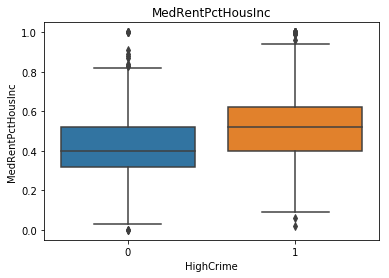

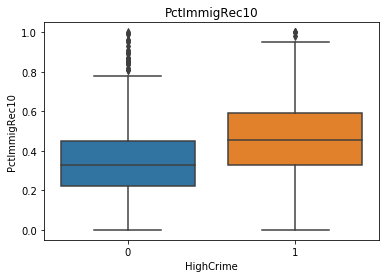

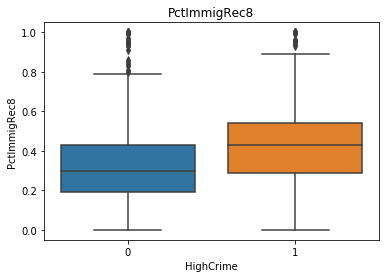

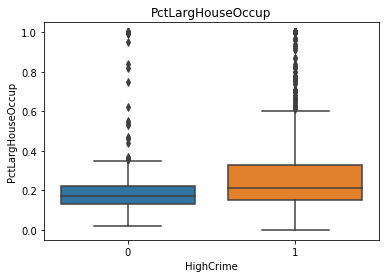

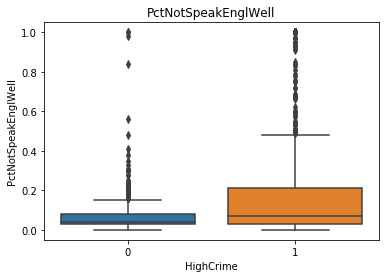

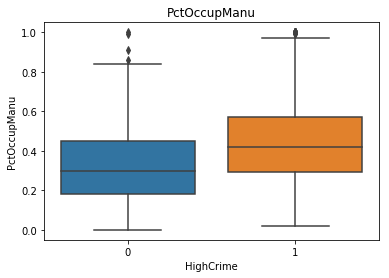

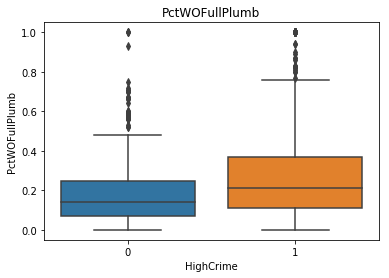

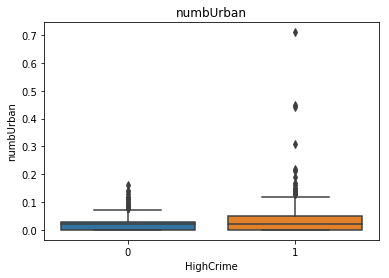

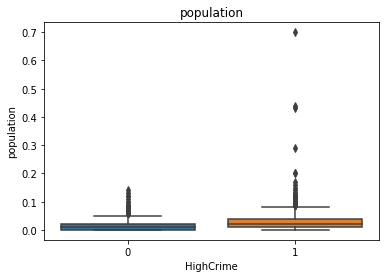

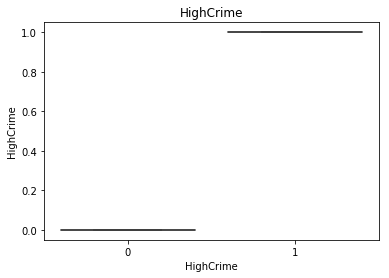

In [135]:
for col in data_pred.columns:
    box=sns.boxplot(x=data_pred.HighCrime, y=data_pred[col])
    plt.title(col)
    plt.show()

Detecting outliers for chosen variables.

In [136]:
Q1 = data_pred.quantile(0.25)
Q3 = data_pred.quantile(0.75)
IQR = Q3 - Q1

data_pred2 = data_pred[~((data_pred < (Q1 - 1.5 * IQR)) |(data_pred > (Q3 + 1.5 * IQR))).any(axis=1)]

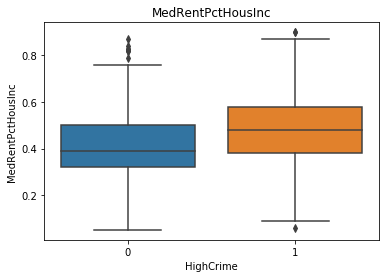

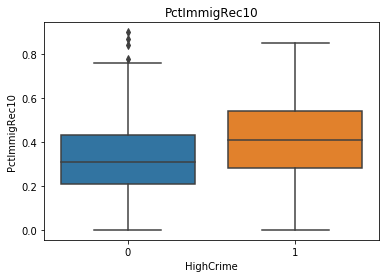

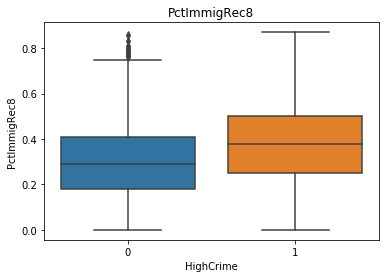

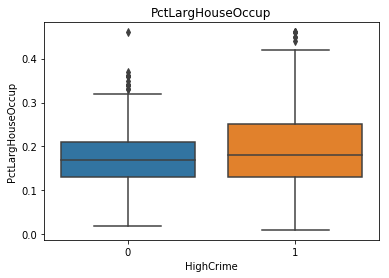

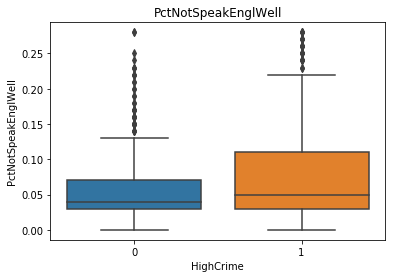

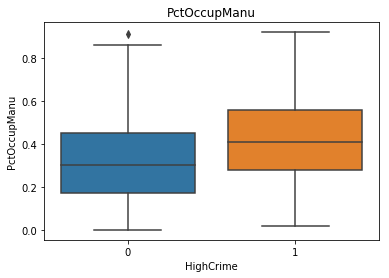

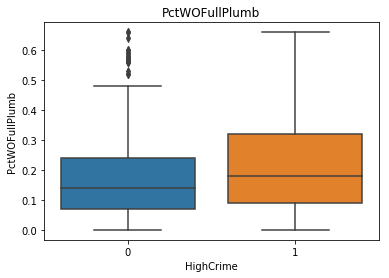

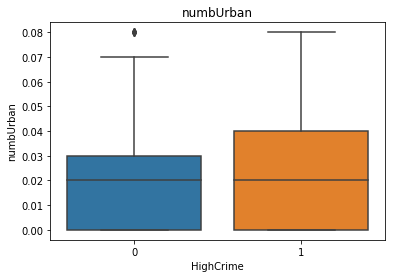

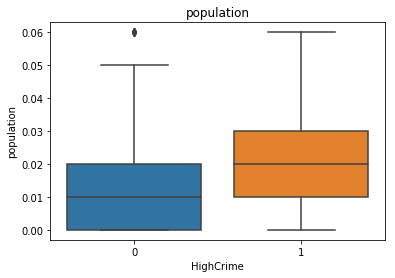

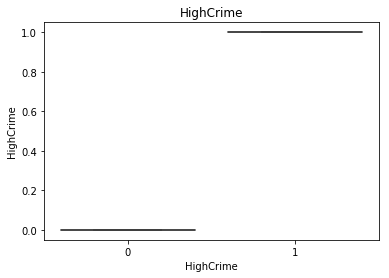

In [137]:
for col in data_pred2.columns:
    box=sns.boxplot(x=data_pred2.HighCrime, y=data_pred2[col])
    plt.title(col)
    plt.show()

In [138]:
#better!!!

In [139]:
X_new3=data_pred2[['MedRentPctHousInc','PctImmigRec10','PctImmigRec8','PctLargHouseOccup','PctNotSpeakEnglWell','PctOccupManu','PctWOFullPlumb','numbUrban','population']]
y_new3=data_pred2.HighCrime

In [140]:
data_pred2.head()

,MedRentPctHousInc,PctImmigRec10,PctImmigRec8,PctLargHouseOccup,PctNotSpeakEnglWell,PctOccupManu,PctWOFullPlumb,numbUrban,population,HighCrime
1,0.29,0.63,0.64,0.10,0.10,0.42,0.00,0.02,0.00,1
2,0.48,0.19,0.15,0.20,0.04,0.49,0.45,0.00,0.00,1
4,0.22,0.27,0.20,0.19,0.05,0.42,0.14,0.02,0.01,0
5,0.47,0.47,0.43,0.19,0.28,0.06,0.05,0.04,0.02,1
6,0.46,0.10,0.02,0.13,0.05,0.33,0.05,0.02,0.01,0


In [187]:
data_pred2.shape

(1046, 10)

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X_new3, y_new3, test_size=0.2, random_state=0)

In [189]:
X_train.shape

(836, 9)

In [143]:
logr=LogisticRegression()

In [144]:
model=logr.fit(X_train,y_train)

In [145]:
predicted=model.predict(X_test)

In [146]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [147]:
print('Accuracy score : ', accuracy_score(y_test,predicted))

Accuracy score :  0.6619047619047619


In [148]:
confusion_matrix(y_test,predicted)

array([[70, 38],
       [33, 69]], dtype=int64)

In [149]:
print('Accuracy : ', (91+211)/(91+65+32+211))

Accuracy :  0.7568922305764411


In [150]:
print('Misclassification rate  : ', (65+32)/(91+65+32+211))

Misclassification rate  :  0.24310776942355888


In [151]:
predicted[predicted==1].sum()

107

In [152]:
print('Precision : ', 211/276)

Precision :  0.7644927536231884


In [153]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [154]:
pred_roc1=logr.fit(X_train,y_train).predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thresholds=roc_curve(y_test,pred_roc1)
roc_auc1=auc(false_positive_rate,true_positive_rate)
roc_auc1


0.7200435729847495

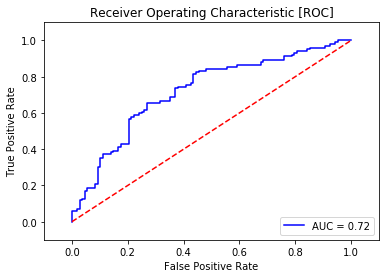

In [155]:
plt.title('Receiver Operating Characteristic [ROC]')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


We got accuracy 66% after removing outliers!

Before moving outliers:

In [195]:
X_new3=data_pred[['MedRentPctHousInc','PctImmigRec10','PctImmigRec8','PctLargHouseOccup','PctNotSpeakEnglWell','PctOccupManu','PctWOFullPlumb','numbUrban','population']]
y_new3=data_pred.HighCrime

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X_new3, y_new3, test_size=0.2, random_state=0)
model=logr.fit(X_train,y_train)
predicted=model.predict(X_test)
print('Accuracy score : ', accuracy_score(y_test,predicted))
print('Accuracy : ', (80+139)/(80+139+33+30))
print('Misclassification rate  : ', (65+32)/(91+65+32+211))

Accuracy score :  0.776595744680851
Accuracy :  0.776595744680851
Misclassification rate  :  0.24310776942355888


In [202]:
confm=confusion_matrix(y_test,predicted)
confm

array([[ 80,  33],
       [ 30, 139]], dtype=int64)

In [204]:
TP = confm[1, 1]
TN = confm[0, 0]
FP = confm[0, 1]
FN = confm[1, 0]

In [205]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))


              precision    recall  f1-score   support

           0       0.73      0.71      0.72       113
           1       0.81      0.82      0.82       169

   micro avg       0.78      0.78      0.78       282
   macro avg       0.77      0.77      0.77       282
weighted avg       0.78      0.78      0.78       282



In [198]:
pred_roc1=logr.fit(X_train,y_train).predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thresholds=roc_curve(y_test,pred_roc1)
roc_auc1=auc(false_positive_rate,true_positive_rate)
roc_auc1


0.8071948473582239

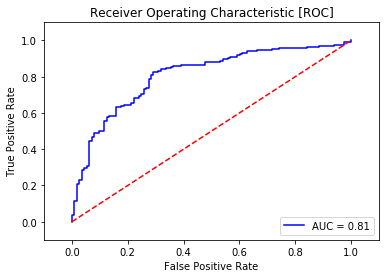

In [199]:
plt.title('Receiver Operating Characteristic [ROC]')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# 2. Creating dummy with given police data

In [156]:
def Police_more_than_100(data):
    if data['PolicCars'] == '?':
        return 0
    else:
        return 1

In [157]:
data_dummy=pd.DataFrame(data)

In [158]:
data_dummy.head(2)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67


In [159]:
data_dummy['Police_more_than_100']=data_dummy.apply(Police_more_than_100, axis=1)
data_dummy.head(5)
data_dummy.replace('?',np.nan, inplace=True)

In [160]:
data_dummy['HighCrime']=data_dummy.apply(HighCrime, axis=1)

In [161]:
data_dummy.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,Police_more_than_100,HighCrime
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20,1,1
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67,0,1
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43,0,1
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12,0,1
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03,0,0


In [162]:
data_dummy=data_dummy.drop(data.ix[:, 'state':'fold'].columns, axis = 1)

In [163]:
data_dummy.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,Police_more_than_100,HighCrime
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20,1,1
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67,0,1
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43,0,1
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12,0,1
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03,0,0


In [164]:
data_dummy.isnull().sum()

population                 0
householdsize              0
racepctblack               0
racePctWhite               0
racePctAsian               0
racePctHisp                0
agePct12t21                0
agePct12t29                0
agePct16t24                0
agePct65up                 0
numbUrban                  0
pctUrban                   0
medIncome                  0
pctWWage                   0
pctWFarmSelf               0
pctWInvInc                 0
pctWSocSec                 0
pctWPubAsst                0
pctWRetire                 0
medFamInc                  0
perCapInc                  0
whitePerCap                0
blackPerCap                0
indianPerCap               0
AsianPerCap                0
OtherPerCap                1
HispPerCap                 0
NumUnderPov                0
PctPopUnderPov             0
PctLess9thGrade            0
                        ... 
PctSameState85             0
LemasSwornFT            1675
LemasSwFTPerPop         1675
LemasSwFTField

In [165]:
data_dummy['OtherPerCap']=data_dummy[data_dummy.OtherPerCap != np.nan]

In [166]:
data_dummy.isnull().sum()

population                 0
householdsize              0
racepctblack               0
racePctWhite               0
racePctAsian               0
racePctHisp                0
agePct12t21                0
agePct12t29                0
agePct16t24                0
agePct65up                 0
numbUrban                  0
pctUrban                   0
medIncome                  0
pctWWage                   0
pctWFarmSelf               0
pctWInvInc                 0
pctWSocSec                 0
pctWPubAsst                0
pctWRetire                 0
medFamInc                  0
perCapInc                  0
whitePerCap                0
blackPerCap                0
indianPerCap               0
AsianPerCap                0
OtherPerCap                0
HispPerCap                 0
NumUnderPov                0
PctPopUnderPov             0
PctLess9thGrade            0
                        ... 
PctSameState85             0
LemasSwornFT            1675
LemasSwFTPerPop         1675
LemasSwFTField

In [167]:
data_dummy=data_dummy.dropna(axis='columns')

In [168]:
data_dummy.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop,Police_more_than_100,HighCrime
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20,1,1
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67,0,1
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43,0,1
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12,0,1
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03,0,0


In [169]:
data_dummy=data_dummy.drop(columns='ViolentCrimesPerPop')

In [170]:
data_dummy.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,Police_more_than_100,HighCrime
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,1,1
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0,1
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0,1
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0,1
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0,0


In [171]:
final_iv_dummy, IV_dummy = data_vars(data_dummy.iloc[:,:-1],data_dummy.HighCrime)

In [172]:
IV_dummy[IV_dummy.VAR_NAME=='Police_more_than_100']

,VAR_NAME,IV
71,Police_more_than_100,0.386626


In [173]:
data_dummy['Police_more_than_100'].corr(data_dummy.HighCrime)

0.254267225509078

In [238]:
# also good correlation!

In [174]:
Q1 = data_dummy.quantile(0.25)
Q3 = data_dummy.quantile(0.75)
IQR = Q3 - Q1

data_dummy2 = data_dummy[~((data_dummy < (Q1 - 1.5 * IQR)) |(data_dummy > (Q3 + 1.5 * IQR))).any(axis=1)]

In [175]:
X_new4=data_dummy2[['MedRentPctHousInc','PctImmigRec10','PctImmigRec8','PctLargHouseOccup','PctNotSpeakEnglWell','PctOccupManu','PctWOFullPlumb','numbUrban','population','Police_more_than_100','HighCrime']]

In [176]:
y_new4=data_dummy2.HighCrime

In [177]:
X_new4.shape

(482, 11)

In [178]:
y_new4.shape

(482,)

In [179]:
X_train4,X_test4, y_train4, y_test4 = train_test_split(X_new4 , y_new4, test_size=0.2,random_state=0)

In [180]:
model2=logr.fit(X_train4 , y_train4)

In [181]:
predicted2=model2.predict(X_test4)

In [182]:
print('Accuracy score : ', accuracy_score(y_test4,predicted2))

Accuracy score :  1.0


In [183]:
confusion_matrix(y_test4,predicted2)

array([[52,  0],
       [ 0, 45]], dtype=int64)

In [184]:
pred_roc2=logr.fit(X_train4,y_train4).predict_proba(X_test4)[:,1]
false_positive_rate4, true_positive_rate4, thresholds4=roc_curve(y_test4,pred_roc2)
roc_auc2=auc(false_positive_rate4,true_positive_rate4)
roc_auc2

1.0

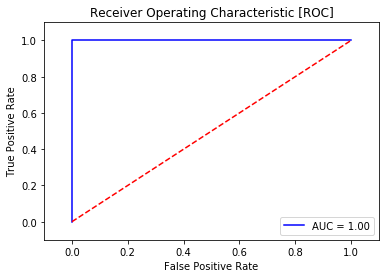

In [185]:
plt.title('Receiver Operating Characteristic [ROC]')
plt.plot(false_positive_rate4, true_positive_rate4, 'b',
label='AUC = %0.2f'% roc_auc2)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Maybe it is impossible to have 100% correct preditcting power in the terms of Vio in population . Maybe this is the case of overfitting data. Previous case is much better.

Final result is firstly predicted data!